# NMS Algorithm

- Input: images with a json file with several bounding boxes some of them overlaping each other
- Output: the image with the bounding boxes filtered

NMS Algorithm is used on the objet detection field, the output of the detector usually are
many proposals regions (bounding boxes) per detection, this algorithm reduce the amount of bb to 1

In [9]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

### Get the bounding boxes and draw over image

In [10]:
def json_to_array(json_path):
    """ open a json file
    return numpy array of bounding boxes values
    """
    with open('files/car_london_bb.json') as json_file:
        data = json.load(json_file)
    bbs_array = np.empty((0, 5), int)
    for line in data:
        bbs_array = np.vstack((np.array(list(line.values())), bbs_array))

    return bbs_array

In [11]:
def draw_image_rect(image_path, rects):
    """ open image and draw the
    bbs on the images.
    rects = []
    """
    im = np.array(Image.open(image_path), dtype=np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    for rect in rects:
        draw_rect = patches.Rectangle((rect[1], rect[0]), rect[2], rect[3],
                                      linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(draw_rect)
        # ax.text(rect[1]/im.shape[1], rect[0]/im.shape[0], str(round(rect[4],4)), 
        #        transform=ax.transAxes, fontsize=12, color='yellow',weight='bold')
    plt.show()

In [12]:
def nms(bbs, threshold):
    """ with np array of bounding boxes 
    with the score of it and a threshold,
    return the reduced bounding boxes 
    with the nms greedy algorithm.
    """
    # Take the element with higest score 
    # add it to the final proposals 
    # and remove it from the array
    bbs = bbs[bbs[:, 4].argsort()][::-1]
    bb_filtered = np.empty((0, 5), int)

    while (len(bbs) != 0):
        bb_temp = bbs[0]
        bbs = np.delete(bbs, 0, 0)

        # if IOU is bigger than threshold 
        # remove it from the array
        iou = calc_iou(bbs, bb_temp)
        bbs = np.delete(bbs, np.argwhere(iou > threshold), 0)
        bb_filtered = np.append(bb_filtered, [bb_temp], axis=0)

    return bb_filtered

In [13]:
def calc_iou(bbs, bb_temp):
    """Calculate the IOU (Intersection over Union)"""

    x1 = bbs[:, 1]
    y1 = bbs[:, 0]
    x2 = bbs[:, 1] + bbs[:, 2]
    y2 = bbs[:, 0] + bbs[:, 3]

    inter = (np.minimum(x2, (bb_temp[1] + bb_temp[2])) - np.maximum(x1, bb_temp[1])) * (np.minimum(y2, (bb_temp[0] + bb_temp[3])) - np.maximum(y1, bb_temp[0]))
    union = bbs[:, 2] * bbs[:, 3] + bb_temp[2] * bb_temp[3] - inter
    iou = inter / union

    return iou

![Intersection over Union](iou.png "Intersection over Union")

## Tests

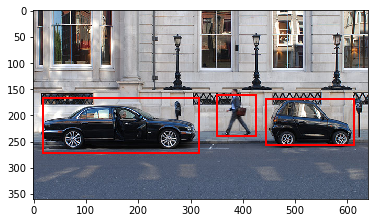

In [14]:
draw_image_rect('files/car_london.jpg', nms(json_to_array('files/car_london_bb.json'), 0.5))

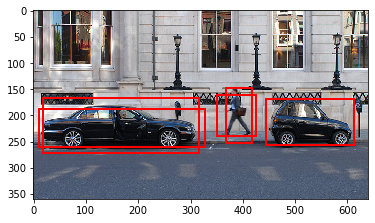

In [15]:
draw_image_rect('files/car_london.jpg', nms(json_to_array('files/car_london_bb.json'), 0.7))

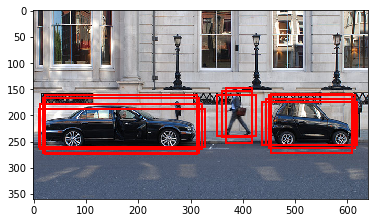

In [16]:
draw_image_rect('files/car_london.jpg', nms(json_to_array('files/car_london_bb.json'), 0.9))